# prepearion

In [16]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
os.chdir('/Users/carlahugod/Desktop/UNI/3sem/ML/Project2')
os.getcwd()

'/Users/carlahugod/Desktop/UNI/3sem/ML/Project2'

In [18]:
# Load data
filename = 'sd-data_cleanedv1.csv'
df = pd.read_csv(filename)
attributes = list(df.columns.values)
print(attributes)
y = df.hemoglobin
X = df.drop('hemoglobin', axis=1)
X.head()

['SM1', 'SM2', 'SM3', 'HearingL1', 'HearingL2', 'HearingR1', 'HearingR2', 'sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']


,SM1,SM2,SM3,HearingL1,HearingL2,HearingR1,HearingR2,sex,age,height,...,tot_chole,HDL_chole,LDL_chole,triglyceride,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,-0.889600,0.835851,...,-0.066106,-0.518379,0.361633,-0.392758,-0.215243,0.290339,-0.278128,0.363052,0.056803,1
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,-1.242185,1.913084,...,0.839252,-0.112294,0.975420,-0.108994,-0.215243,0.082239,-0.334256,0.402270,-0.201034,0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,-0.537015,0.297234,...,-1.540545,-0.924464,-1.089136,-0.275338,-0.215243,0.082239,1.181199,0.245398,0.612146,0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.168155,1.374467,...,0.140833,1.105961,-0.252154,-0.255769,-0.215243,0.498439,0.170896,0.323834,-0.379537,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.168155,0.297234,...,0.089098,0.235779,0.110538,-0.275338,-0.215243,-0.125861,-0.390383,-0.538960,-0.240702,0


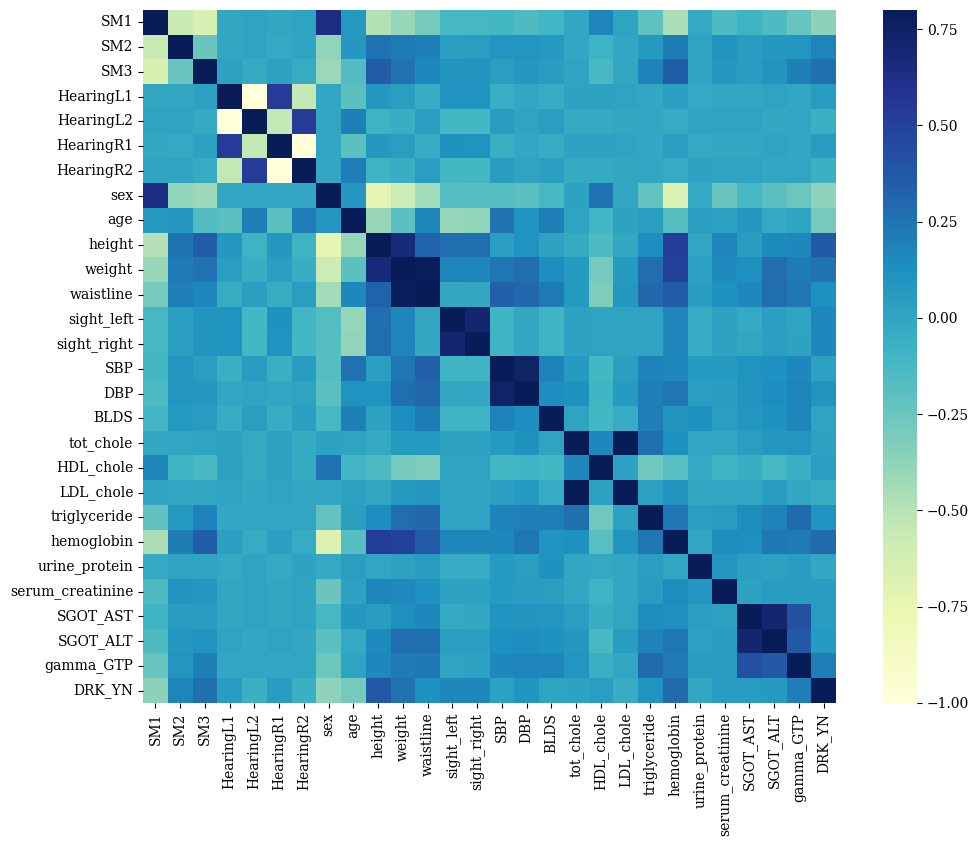

In [19]:
# We want to predict hemoglobin levels. beacuse below we see that it has more correlation with the other variables.

# Now creating a heat map correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu");
plt.show()

    

# Linear Reg

In [20]:
import os
os.getcwd()

'/Users/carlahugod/Desktop/UNI/3sem/ML/Project2'

In [21]:
os.chdir('/Users/carlahugod/Desktop/UNI/3sem/ML/Toolbox_Python/Scripts')

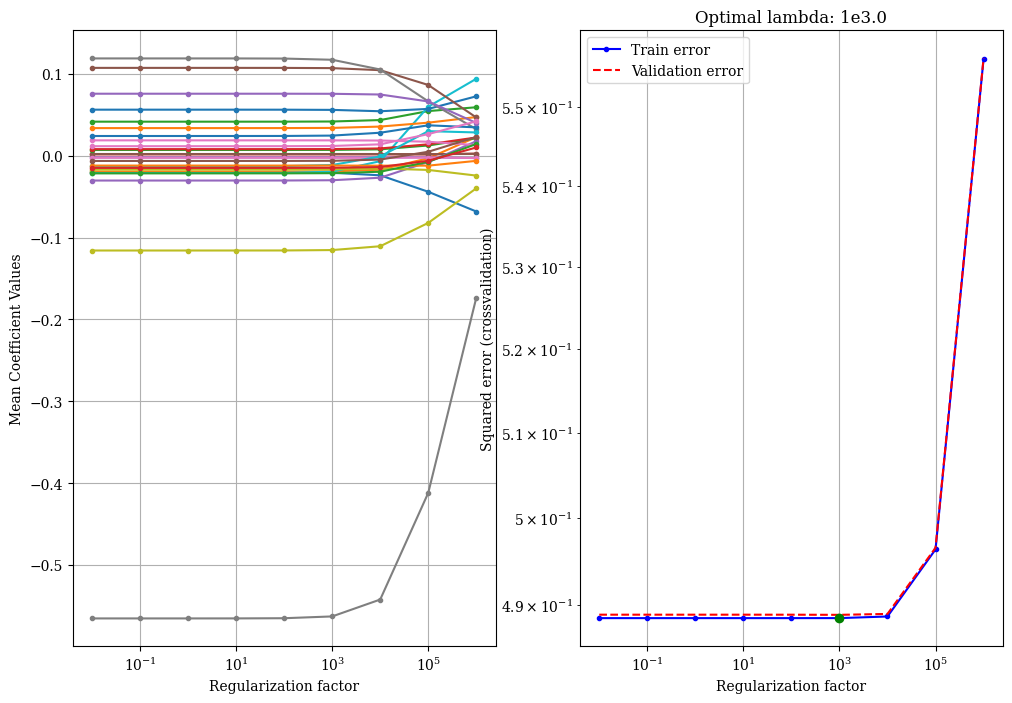

Linear regression without feature selection:
- Training error: 0.48877090361889525
- Test error:     0.48908496844570076
- R^2 train:     0.5112290792558929
- R^2 test:     0.5109136435449151

Regularized linear regression:
- Training error: 0.4887710489718324
- Test error:     0.4890824870530312
- R^2 train:     0.5112289339029507
- R^2 test:     0.5109161249446268

Weights in last fold:
         Offset            -0.0
            SM1           -0.02
            SM2           -0.02
            SM3            0.04
      HearingL1             0.0
      HearingL2            -0.0
      HearingR1             0.0
      HearingR2            -0.0
            sex           -0.56
            age           -0.12
         height           -0.02
         weight            0.06
      waistline            0.03
     sight_left            0.01
    sight_right            0.01
            SBP           -0.03
            DBP            0.11
           BLDS            0.02
      tot_chole            0.12


In [22]:

from matplotlib.pylab import (figure, semilogx, loglog, xlabel, ylabel, legend, 
                           title, subplot, show, grid)
import numpy as np
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
import matplotlib 
from Master import rlr_validate
matplotlib.rcParams['font.family'] = 'serif'


X = X.values
y = y = df.hemoglobin.values
attributeNames = list(df.columns.values)

N, M = X.shape

# Add offset attribute
X = np.concatenate((np.ones((X.shape[0],1)),X),1)
attributeNames = [u'Offset']+attributeNames
M = M+1

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(K, shuffle=True)
#CV = model_selection.KFold(K, shuffle=False)

# Values of lambda
lambdas = np.power(10.,range(-2,7)) # this is the range of lambda values we will consider, so [10**(-1); 10**5]

# Initialize variables
#T = len(lambdas)
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_rlr = np.empty((K,1))
Error_test_rlr = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
w_rlr = np.empty((M,K)) # weight vector for ridge regression
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

k=0
for train_index, test_index in CV.split(X,y):
    
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10    
    
    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)

    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions) - for brevity we won't always store these in the scripts
    mu[k, :] = np.mean(X_train[:, 1:], 0)
    sigma[k, :] = np.std(X_train[:, 1:], 0)
    
    X_train[:, 1:] = (X_train[:, 1:] - mu[k, :] ) / sigma[k, :] 
    X_test[:, 1:] = (X_test[:, 1:] - mu[k, :] ) / sigma[k, :] 
    
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train
    
    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum(axis=0)/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum(axis=0)/y_test.shape[0]

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]

    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:,k] = np.linalg.solve(XtX,Xty).squeeze()
    # Compute mean squared error without regularization
    #Error_train[k] = np.square(y_train-X_train @ w_noreg[:,k]).sum(axis=0)/y_train.shape[0]
    #Error_test[k] = np.square(y_test-X_test @ w_noreg[:,k]).sum(axis=0)/y_test.shape[0]
    # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
    m = lm.LinearRegression().fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Display the results for the last cross-validation fold
    if k == K-1:
        figure(k, figsize=(12,8))
        subplot(1,2,1)
        semilogx(lambdas,mean_w_vs_lambda.T[:,1:],'.-') # Don't plot the bias term
        xlabel('Regularization factor')
        ylabel('Mean Coefficient Values')
        grid()
        # You can choose to display the legend, but it's omitted for a cleaner 
        # plot, since there are many attributes
        #legend(attributeNames[1:], loc='best')
        
        subplot(1,2,2)
        title('Optimal lambda: 1e{0}'.format(np.log10(opt_lambda)))
        loglog(lambdas,train_err_vs_lambda.T,'b.-',lambdas,test_err_vs_lambda.T,'r--')
        plt.plot(opt_lambda, 4.885*10**(-1), 'og', label='Optimal lambda')
        xlabel('Regularization factor')
        ylabel('Squared error (crossvalidation)')
        legend(['Train error','Validation error'])
        grid()
    
    # To inspect the used indices, use these print statements
    #print('Cross validation fold {0}/{1}:'.format(k+1,K))
    #print('Train indices: {0}'.format(train_index))
    #print('Test indices: {0}\n'.format(test_index))

    k+=1

show()
# Display results
print('Linear regression without feature selection:')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Regularized linear regression:')
print('- Training error: {0}'.format(Error_train_rlr.mean()))
print('- Test error:     {0}'.format(Error_test_rlr.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_rlr.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test_rlr.sum())/Error_test_nofeatures.sum()))

print('Weights in last fold:')
for m in range(M):
    print('{:>15} {:>15}'.format(attributeNames[m], np.round(w_rlr[m,-1],2)))

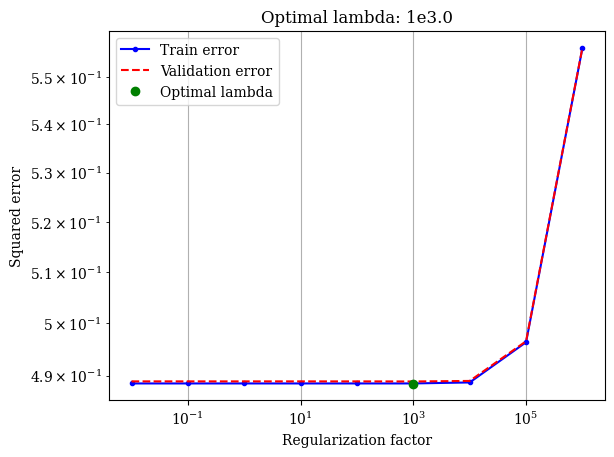

In [23]:
# Now only plotting optimal lambda:



min_error = np.min(Error_test)
opt_lambda_idx = np.argmin(Error_test)

title('Optimal lambda: 1e{0}'.format(np.log10(opt_lambda)))
loglog(lambdas,train_err_vs_lambda.T,'b.-',lambdas,test_err_vs_lambda.T,'r--')
plt.plot(opt_lambda, 4.885*10**(-1), 'og', label='Optimal lambda')
xlabel('Regularization factor') 
ylabel('Squared error') 
legend(['Train error','Validation error', 'Optimal lambda'])
grid()

In [24]:
weights = w_rlr[:,-1] # weights in last fold
weights

array([-3.91260789e-05, -2.06303097e-02, -1.89207578e-02,  4.20124634e-02,
        1.83726487e-03, -1.83726487e-03,  2.30118459e-03, -2.30118459e-03,
       -5.63271136e-01, -1.15191818e-01, -1.95363382e-02,  5.63281836e-02,
        3.42062205e-02,  7.30087675e-03,  8.34248187e-03, -2.98162220e-02,
        1.07330867e-01,  1.89823174e-02,  1.16553479e-01, -1.60277574e-02,
       -1.02923660e-02,  2.52404230e-02, -1.18601975e-02, -2.11439787e-02,
       -1.44311648e-02,  7.57049772e-02, -6.00373221e-03,  1.20356198e-02])

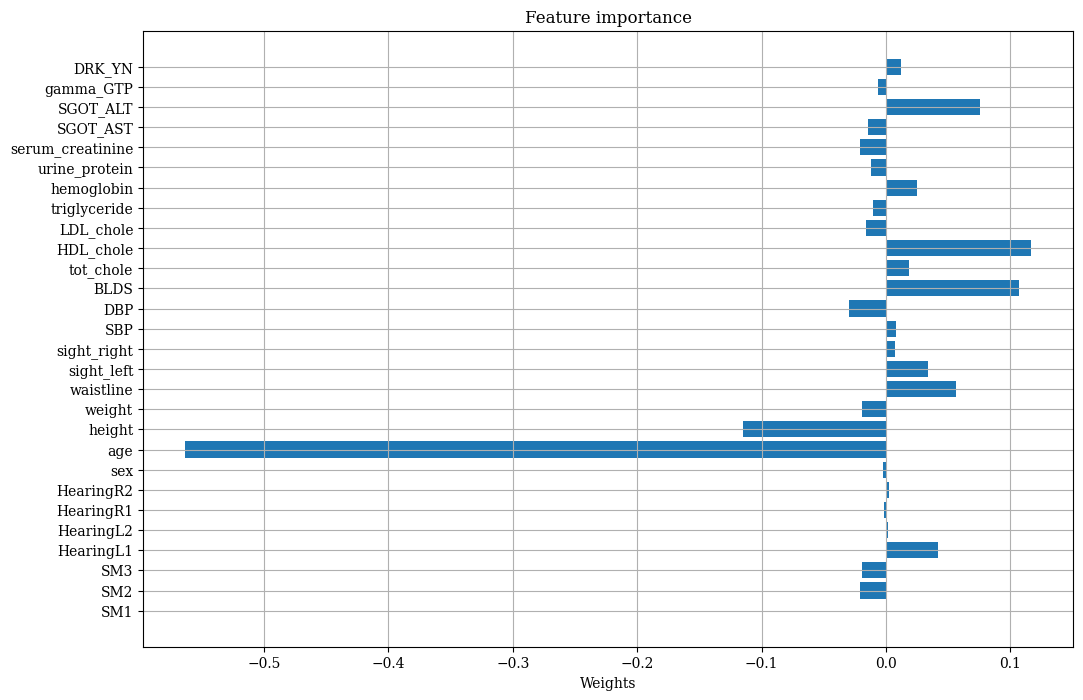

In [25]:


plt.figure(figsize=(12,8))
plt.barh(attributes, weights)
plt.xlabel('Weights')
#plt.plot([0,0.565],[8,8],'-or')
plt.title('Feature importance')
plt.grid()
plt.show()
# obs maybe different colors in barplot




# Baseline model for regression:

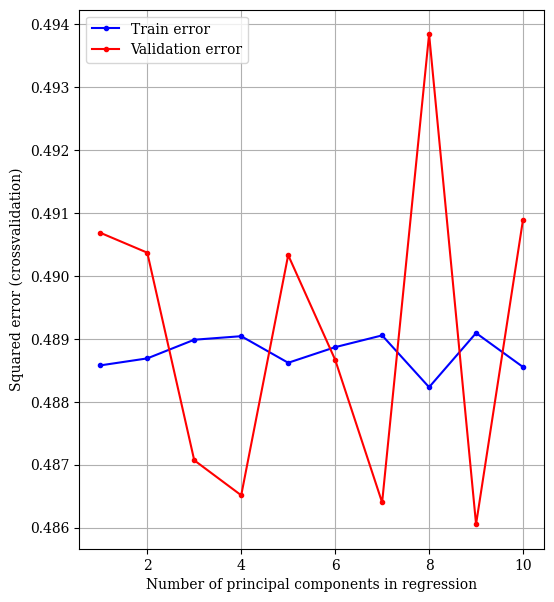

0.4860534271682739 0.4938411007235207


In [28]:
# creating a baseline model:

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# baseline model
from sklearn.dummy import DummyRegressor
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train) # Note that no input features are used
dummy_mean.score(X_test, y_test) # This is the R^2 score

# Plot the error as a function of the number of terms included in the model
figure(figsize=(6,7))
plt.plot(range(1,len(Error_train_rlr)+1), Error_train_rlr, 'b.-', range(1,len(Error_test_rlr)+1), Error_test_rlr, 'r.-')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Squared error (crossvalidation)')
plt.legend(['Train error','Validation error'])
plt.grid()
plt.show()

# the minimum error;
min_error = np.min(Error_test_rlr)
max_error = np.max(Error_test_rlr)
print(min_error, max_error)
